In [56]:
import numpy as np
from uncertainties import ufloat
import astropy.units as u
import astropy.constants as c

Rstar = ufloat(0.307,0.011)*u.Rsun.to(u.cm) #rsun
Mstar = ufloat(0.279,0.014)*u.Msun.to(u.g) #msun

#Gm/r2
g=c.G.cgs*Mstar.n*u.g/(Rstar.n*u.cm)**2
gerr=c.G.cgs*Mstar.s*u.g/(Rstar.s*u.cm)**2
np.log10(g.value), np.log10(gerr.value)

(4.909395079622358, 6.5014102926649215)

In [72]:
N=100_000
Rs = np.random.rand(N)*Rstar.s+Rstar.n
Ms = np.random.rand(N)*Mstar.s+Mstar.n

In [78]:
g=c.G.cgs*Ms*u.g/(Rs*u.cm)**2
g

<Quantity [79449.37923251, 81402.72489776, 83603.1206254 , ...,
           81488.11698342, 77396.59849772, 78227.15835256] cm / s2>

4.89
4.90
4.92


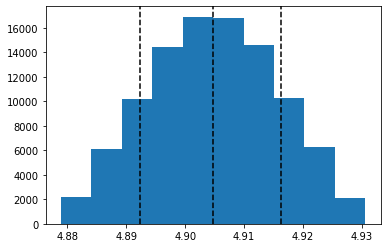

In [84]:
import matplotlib.pyplot as pl

logg=np.log10(g.value)
l,m,u=np.percentile(logg, q=(14,50,84))
pl.hist(logg)
for x in [l,m,u]:
    pl.axvline(x,0,1,ls='--',c='k')
    print(f"{x:.2f}")

In [85]:
np.mean(logg), np.std(logg)

(4.904795566859133, 0.010745453528129167)